# 座椅图像数据读取

In [9]:
import warnings
import PIL
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import os
import random
from PIL import Image

warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


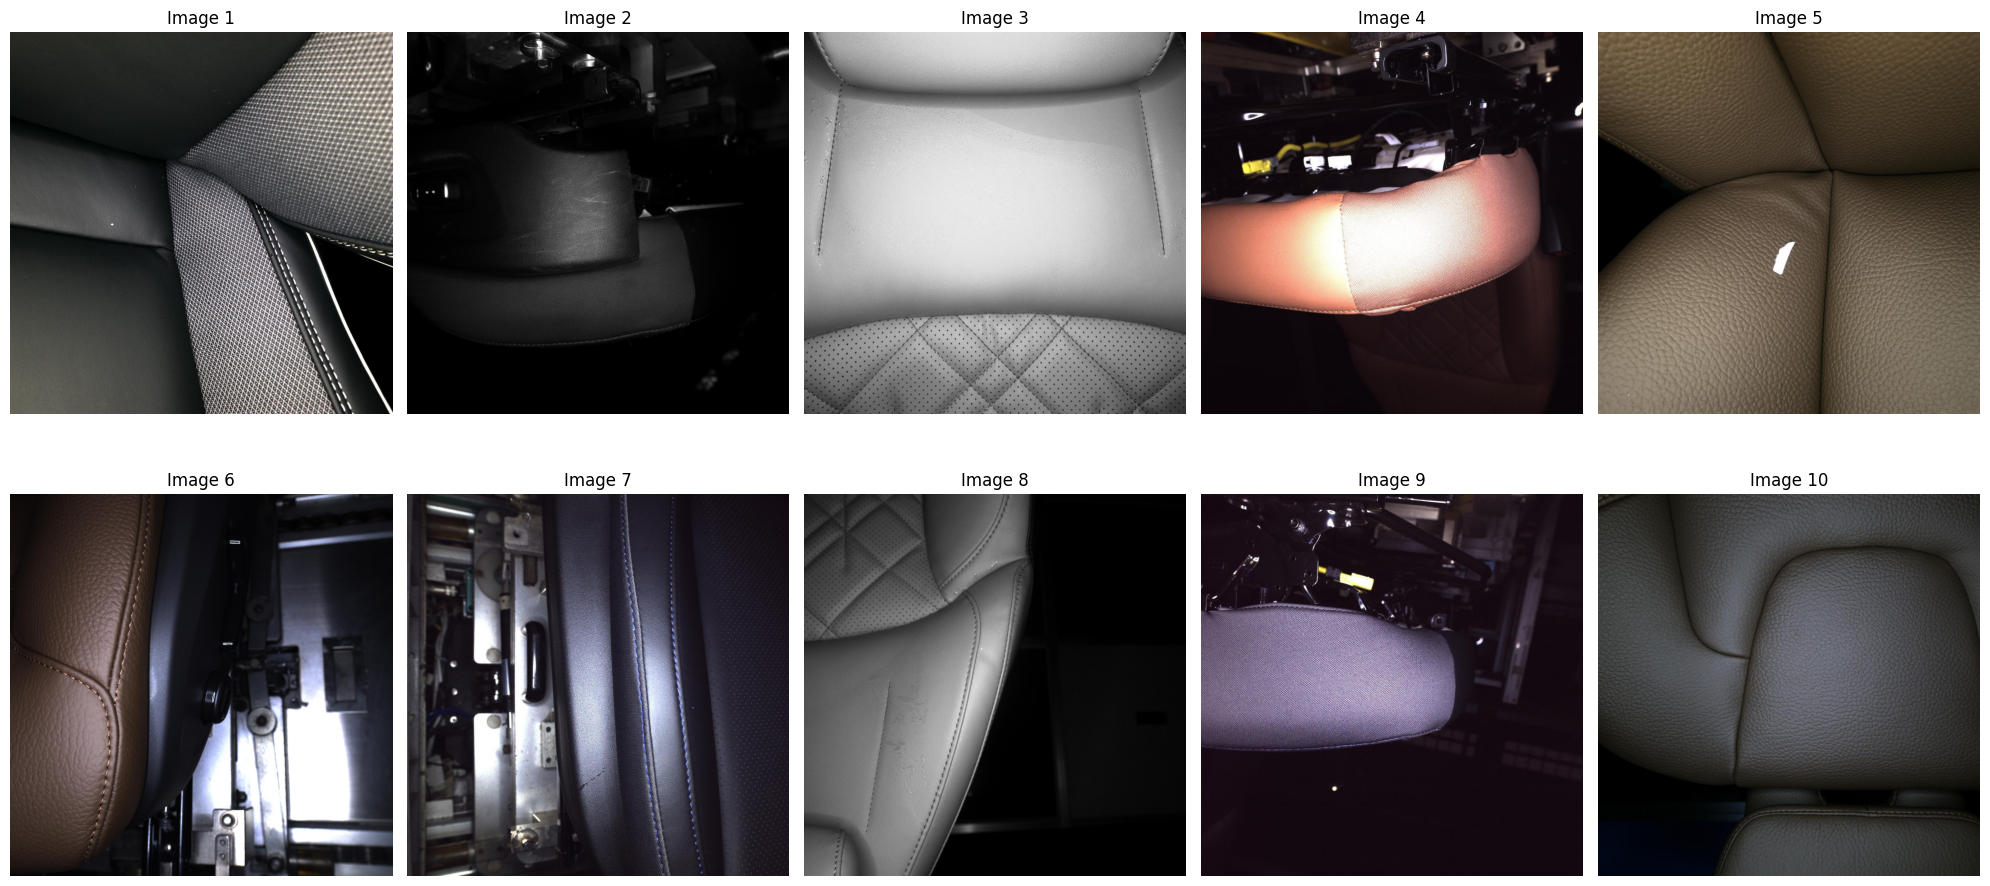

In [2]:
# 设置图片文件夹路径
img_folder = r"C:\Users\Rooki\Desktop\AI\CV\RT-DETR\chengdu_dataset\train"

# 获取文件夹下所有图片文件
img_files = [f for f in os.listdir(img_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# 随机选择10张图片
selected_files = random.sample(img_files, 10)

# 创建子图布局
plt.figure(figsize=(20, 10))

# 读取并显示选中的图片
for i, img_file in enumerate(selected_files, 1):
    img_path = os.path.join(img_folder, img_file)
    img = Image.open(img_path)
    
    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i}')

plt.tight_layout()
plt.show()

In [3]:
import json

# 读取COCO格式的标注文件
annotation_file = r"C:\Users\Rooki\Desktop\AI\CV\RT-DETR\chengdu_dataset\train\_annotations.coco.json"
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

# 打印文件的主要结构
print("COCO标注文件的主要字段:")
for key in annotations.keys():
    print(f"\n{key}:")
    
    # 对于每个主要字段,打印其内容结构
    if isinstance(annotations[key], list) and len(annotations[key]) > 0:
        print(f"长度: {len(annotations[key])}")
        print("第一个元素示例:")
        print(json.dumps(annotations[key][0], indent=2))
    else:
        print(json.dumps(annotations[key], indent=2))

# 统计一些基本信息
print("\n基本统计信息:")
print(f"图像数量: {len(annotations['images'])}")
print(f"标注数量: {len(annotations['annotations'])}")
print(f"类别数量: {len(annotations['categories'])}")

# 打印所有类别
print("\n数据集包含的类别:")
for category in annotations['categories']:
    print(f"ID: {category['id']}, 名称: {category['name']}")


COCO标注文件的主要字段:

info:
{
  "description": "Exported from Darwin",
  "url": "n/a",
  "version": "n/a",
  "year": 2025,
  "contributor": "n/a",
  "date_created": "2025-04-15"
}

licenses:
长度: 1
第一个元素示例:
{
  "url": "n/a",
  "id": 0,
  "name": "CC BY 4.0"
}

categories:
长度: 17
第一个元素示例:
{
  "id": 0,
  "name": "\u5212\u75d5",
  "supercategory": "none"
}

images:
长度: 5394
第一个元素示例:
{
  "id": 0,
  "license": 1,
  "file_name": "1744654551214_2d20cbda-dc0a-47a5-a7fc-ec59969b5627__p_0040_d75a83877b4645c6a5b34e993f021e59_6154901fb0bc4ee2b3_1744655549846.jpg",
  "height": 4096.0,
  "width": 4096.0,
  "date_captured": "n/a",
  "mask_null": false,
  "interested_area": [],
  "not_interested_area": []
}

annotations:
长度: 14486
第一个元素示例:
{
  "id": 0,
  "image_id": 0,
  "category_id": 13,
  "bbox": [
    4.0,
    1672.0,
    544.0,
    568.0
  ],
  "area": 308992.0,
  "segmentation": [
    []
  ],
  "transcription": null,
  "iscrowd": 0
}

基本统计信息:
图像数量: 5394
标注数量: 14486
类别数量: 17

数据集包含的类别:
ID: 0, 名称: 划痕
ID:

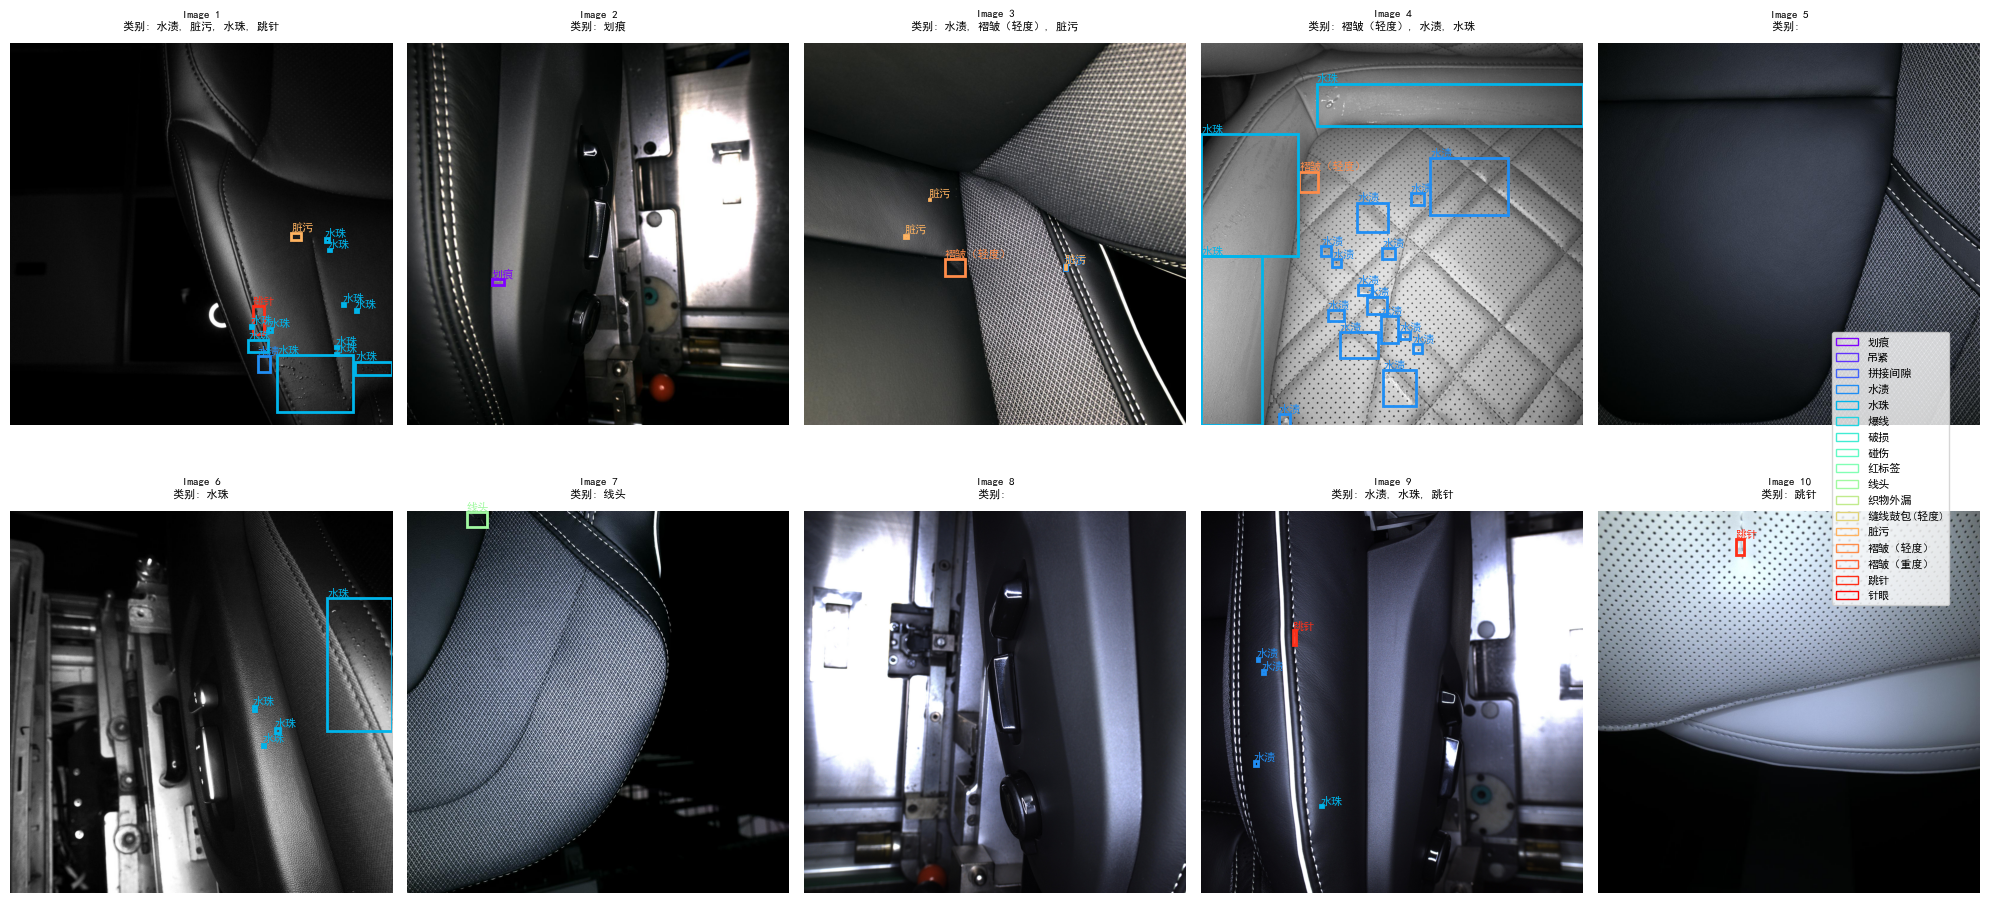

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import numpy as np
from PIL import Image
import os

# 随机选择10张图片
image_ids = random.sample([img['id'] for img in annotations['images']], 10)

# 为每个类别分配一个唯一的颜色
colors = plt.cm.rainbow(np.linspace(0, 1, len(annotations['categories'])))
color_dict = {cat['id']: colors[i] for i, cat in enumerate(annotations['categories'])}

# 创建一个大的图形
plt.figure(figsize=(20, 10))

# 为每张图片绘制边界框
for idx, image_id in enumerate(image_ids, 1):
    # 获取图片信息
    image_info = next(img for img in annotations['images'] if img['id'] == image_id)
    image_filename = image_info['file_name']
    
    # 获取该图片的所有标注
    image_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] == image_id]
    
    # 读取图片
    img_path = os.path.join(r"C:\Users\Rooki\Desktop\AI\CV\RT-DETR\chengdu_dataset\train", image_filename)
    img = Image.open(img_path)
    
    # 创建子图
    ax = plt.subplot(2, 5, idx)
    plt.imshow(img)
    
    # 获取该图片中出现的所有类别
    categories_in_image = set()
    for ann in image_annotations:
        category_id = ann['category_id']
        category_name = next(cat['name'] for cat in annotations['categories'] if cat['id'] == category_id)
        categories_in_image.add(category_name)
    
    # 在图片标题中显示所有类别
    title = f'Image {idx}\n类别: {", ".join(categories_in_image)}'
    plt.title(title, fontsize=8, pad=10)
    
    # 为每个标注绘制边界框
    for ann in image_annotations:
        bbox = ann['bbox']  # [x, y, width, height]
        category_id = ann['category_id']
        category_name = next(cat['name'] for cat in annotations['categories'] if cat['id'] == category_id)
        color = color_dict[category_id]
        
        # 创建矩形框
        rect = patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth=2,
            edgecolor=color,
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # 添加类别标签
        plt.text(bbox[0], bbox[1]-5, category_name, color=color, fontsize=8)
    
    plt.axis('off')

# 添加图例
legend_elements = [patches.Patch(facecolor='none', edgecolor=color_dict[cat['id']], 
                               label=cat['name'])
                  for cat in annotations['categories']]
plt.figlegend(handles=legend_elements, loc='center right', 
              bbox_to_anchor=(0.98, 0.5), fontsize=8)

plt.tight_layout()
plt.show()


### coco标签数据

In [4]:
import json

# 读取COCO格式的标注文件
caption_file = r"C:\Users\Rooki\Desktop\AI\CV\RT-DETR\coco2017\annotations\captions_val2017.json"
with open(caption_file, 'r') as f:
    captions = json.load(f)

# 打印文件的主要结构
print("COCO标注文件的主要字段:")
for key in captions.keys():
    print(f"\n{key}:")
    
    # 对于每个主要字段,打印其内容结构
    if isinstance(captions[key], list) and len(captions[key]) > 0:
        print(f"长度: {len(captions[key])}")
        print("第一个元素示例:")
        print(json.dumps(captions[key][0], indent=2))
    else:
        print(json.dumps(captions[key], indent=2))

# 统计一些基本信息
print("\n基本统计信息:")
print(f"图像数量: {len(captions['images'])}")
print(f"标注数量: {len(captions['annotations'])}")

# 打印几个示例标注
print("\n示例图像标注:")
for i in range(3):  # 打印前3个标注示例
    if i < len(captions['annotations']):
        print(f"\n标注 {i+1}:")
        print(f"图像ID: {captions['annotations'][i]['image_id']}")
        print(f"描述文本: {captions['annotations'][i]['caption']}")


COCO标注文件的主要字段:

info:
{
  "description": "COCO 2017 Dataset",
  "url": "http://cocodataset.org",
  "version": "1.0",
  "year": 2017,
  "contributor": "COCO Consortium",
  "date_created": "2017/09/01"
}

licenses:
长度: 8
第一个元素示例:
{
  "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
  "id": 1,
  "name": "Attribution-NonCommercial-ShareAlike License"
}

images:
长度: 5000
第一个元素示例:
{
  "license": 4,
  "file_name": "000000397133.jpg",
  "coco_url": "http://images.cocodataset.org/val2017/000000397133.jpg",
  "height": 427,
  "width": 640,
  "date_captured": "2013-11-14 17:02:52",
  "flickr_url": "http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg",
  "id": 397133
}

annotations:
长度: 25014
第一个元素示例:
{
  "image_id": 179765,
  "id": 38,
  "caption": "A black Honda motorcycle parked in front of a garage."
}

基本统计信息:
图像数量: 5000
标注数量: 25014

示例图像标注:

标注 1:
图像ID: 179765
描述文本: A black Honda motorcycle parked in front of a garage.

标注 2:
图像ID: 179765
描述文本: A Honda motorcycle parked